<a href="https://colab.research.google.com/github/Aldirhezaldi/PCVK_Genap_2021/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#  import library yang dibutuhkan
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
from matplotlib import pyplot as plt

#akses drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Membaca citra background
Background=cv.imread('/content/drive/MyDrive/image/kosong.jpg');
 
# Membaca citra current frame
Original=cv.imread('/content/drive/MyDrive/image/ada mobil.jpg');

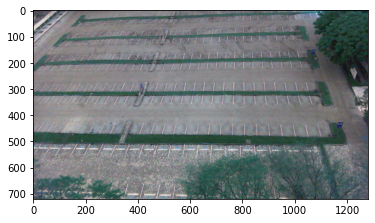

In [39]:
plt.imshow(Background)

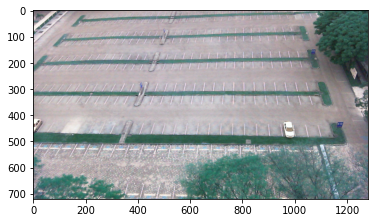

In [40]:
plt.imshow(Original)

In [5]:
Background_gray = cv.imread('/content/drive/MyDrive/image/kosong.jpg', cv.IMREAD_GRAYSCALE);
CurrentFrame_gray=cv.imread('/content/drive/MyDrive/image/ada mobil.jpg', cv.IMREAD_GRAYSCALE);


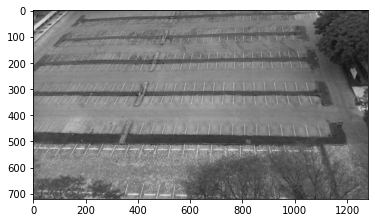

In [36]:
preprocessed_image1=plt.imshow(Background_gray, cmap='gray')

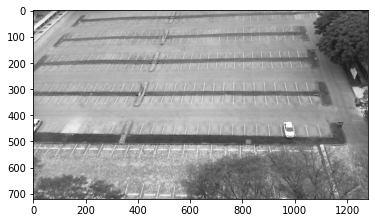

In [37]:
preprocessed_image2=plt.imshow(CurrentFrame_gray, cmap='gray')

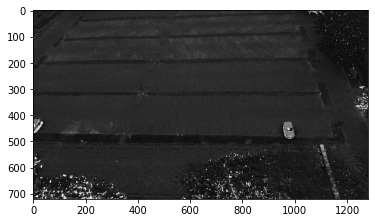

In [44]:
Subtraction = (np.double(Background_gray)-np.double(CurrentFrame_gray));
Subtraction = ((Subtraction))*255;
Subtraction = np.uint8(Subtraction);
plt.imshow(Subtraction , cmap='gray')

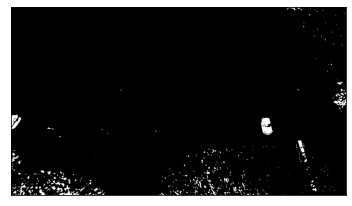

In [141]:
# # global thresholding
# ret1,th1 = cv.threshold(Subtraction,127,255,cv.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv.threshold(Subtraction,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(Subtraction,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(1):
    # plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    # plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    # plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    # plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.imshow(images[i*3+2],'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

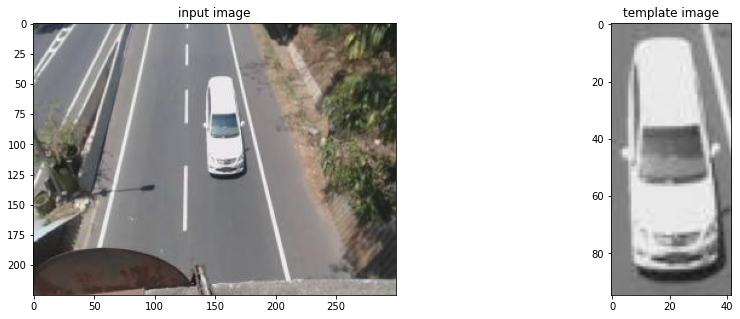

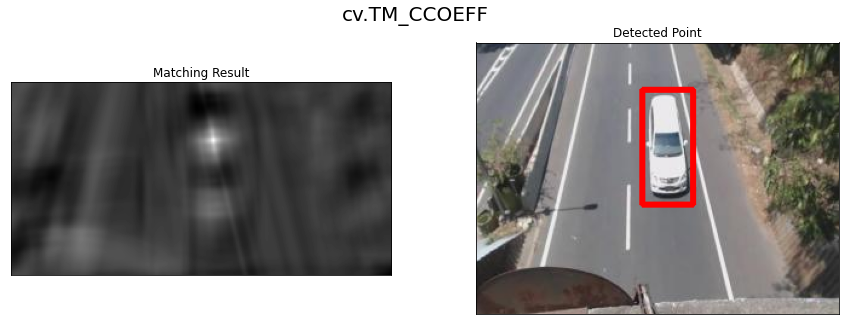

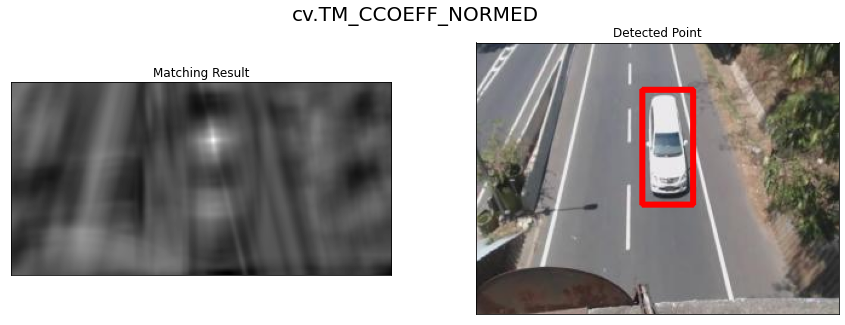

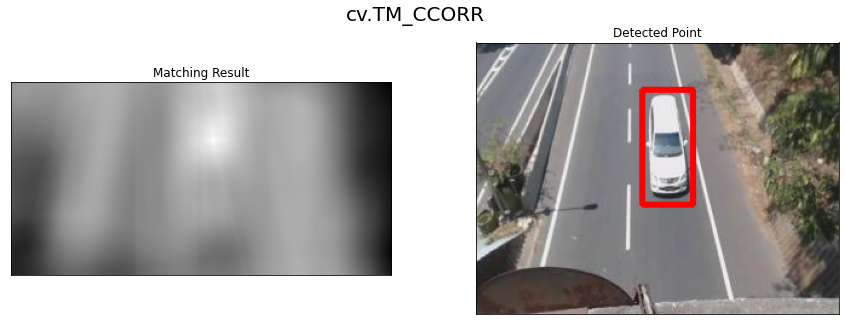

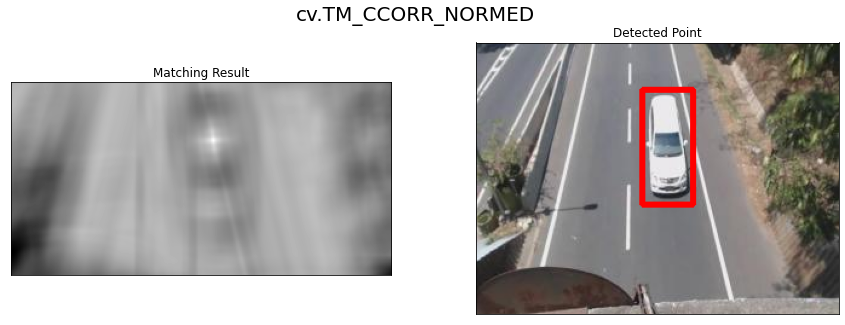

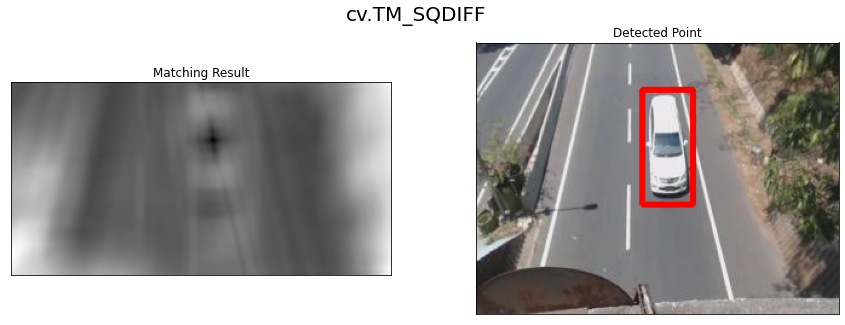

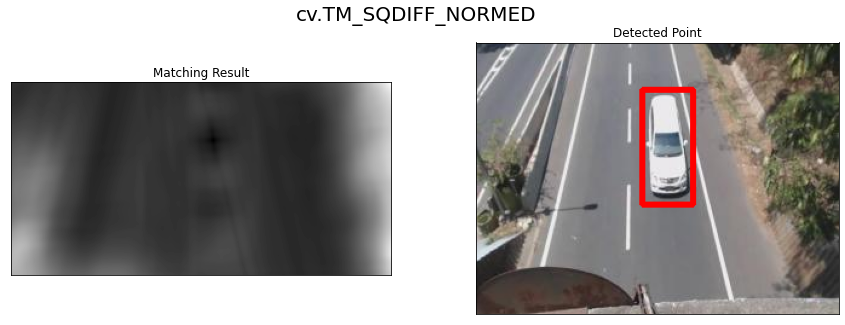

In [239]:
img = cv.imread('/content/drive/MyDrive/image/original1.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/image/mobil1.PNG',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
            
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

In [273]:
# Read image
im_in = cv.imread('/content/drive/MyDrive/image/a56348b43c5ffbacc14d7a9cb40202c9.554x554x1.jpg');
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
th, im_th = cv.threshold(im_in, 220, 255, cv.THRESH_BINARY_INV);
# Copy the thresholded image.
im_floodfill = im_th.copy()
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv.floodFill(im_floodfill, mask, (0,0), 255);
# Invert floodfilled image
im_floodfill_inv = cv.bitwise_not(im_floodfill)
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
# Display images.
plt.imshow(im_th)
# plt.imshow(im_floodfill)
# plt.imshow(im_floodfill_inv)
# plt.imshow(im_out)


TypeError: ignored

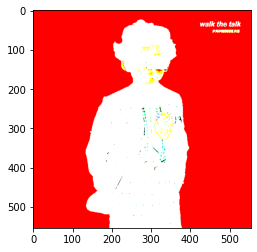

In [252]:
plt.imshow(im_floodfill)

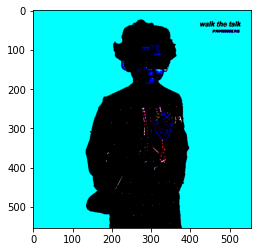

In [253]:
plt.imshow(im_floodfill_inv)

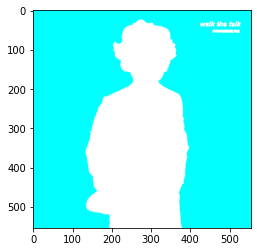

In [254]:
plt.imshow(im_out)

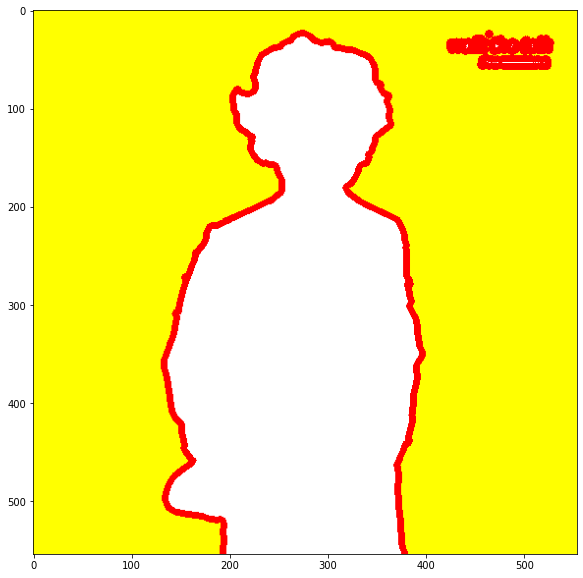

In [255]:
img = im_out

edged = cv.Canny(img, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 5)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))